In [8]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # ✅ ADD THIS
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)
import joblib


In [2]:
# Step 2: Load Cleaned Data
df = pd.read_csv("../../src/data/processed/fc110570_cleaned_vgsales.csv")

In [3]:
# Step 3: Create Binary Label for Classification
df["Hit"] = (df["Global_Sales"] >= 1.0).astype(int)  # Hit if sales >= 1M

In [4]:
# Step 4: Define Features and Target
X = df.drop(columns=["Global_Sales", "Hit"])
y = df["Hit"]

In [5]:
# Step 5: Train/Validation/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Drop non-numeric columns from features (safety check)
print("Text columns in X_train:", X_train.select_dtypes(include=['object']).columns)

X_train = X_train.select_dtypes(exclude=['object'])
X_val = X_val.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

Text columns in X_train: Index(['Name'], dtype='object')


In [9]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [18]:
# Step 9: Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       0.99      0.97      0.98       213

    accuracy                           0.99      1466
   macro avg       0.99      0.98      0.99      1466
weighted avg       0.99      0.99      0.99      1466

Accuracy: 0.9938608458390177
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191


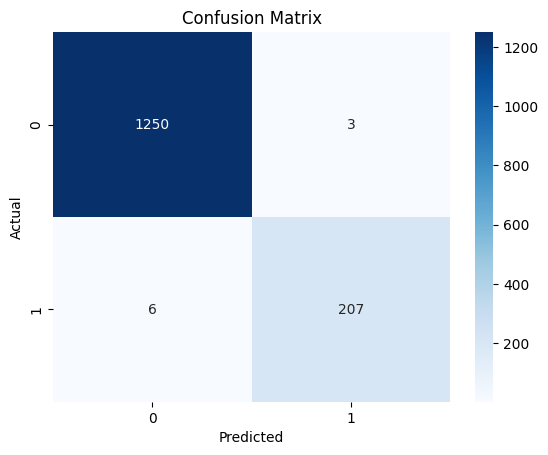

In [19]:
# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

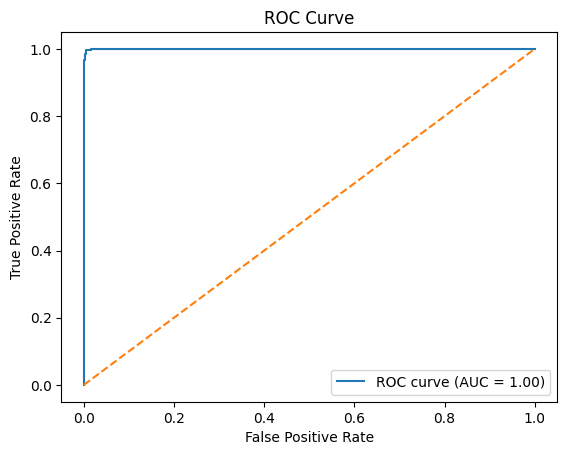

In [20]:
# Step 11: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

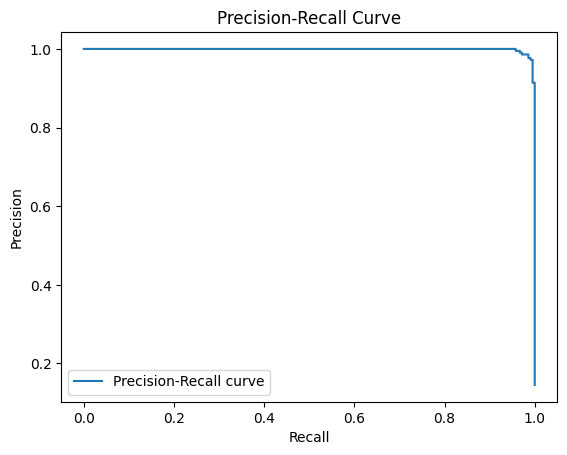

In [21]:
# Step 12: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [22]:
# Step 13: Save the Model
joblib.dump(model, "../../models/fc110570_logistic_model.pkl")
print("\n Logistic Regression model saved to models/logistic_model.pkl")


 Logistic Regression model saved to models/logistic_model.pkl
